Load the data and perform EDA.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

1. Evaluate missing values
2. Assess target class distribution
3. Assess information value of individual features (correlation analysis and pairlot).

5 pts.


In [ ]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import files
uploaded = files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition (6).csv


In [ ]:
# Import dataset

import io
df = pd.read_csv(io.BytesIO(uploaded['HR-Employee-Attrition.csv']))

In [ ]:
# View first few records of dataset

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

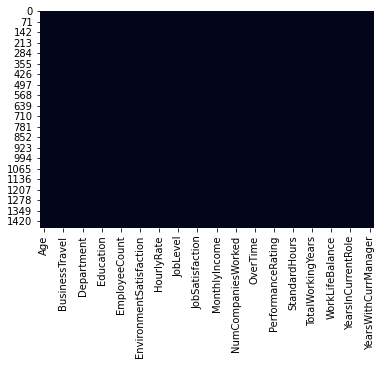

In [ ]:
# Evaluate missing variables using heatmap

sns.heatmap(df.isnull(), cbar=False)

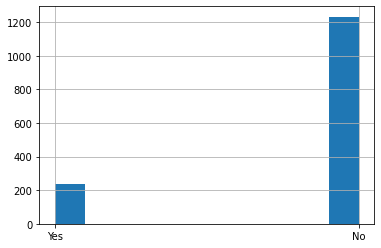

In [ ]:
# Assess target variable distribution using histograph (prior to processing)

df['Attrition'].hist()

4. Pre-process the dataset
5. Split the data into training/test datasets (70/30)

4 pts.

In [ ]:
# Data Preprocessing - coding target variable

df['Attrition'] = df['Attrition'].apply(lambda x:0 if x == 'No' else 1)

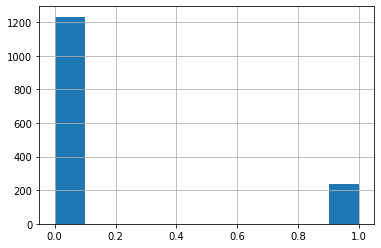

In [ ]:
# Target variable distribution

df['Attrition'].hist()

In [ ]:
# Proportion of employees labeled Yes to Attrition (Employee-Attrition proportion)

df['Attrition'].mean()

0.16122448979591836

In [ ]:
# Data Preprocessing
# Dropping variables with low and high cardinality

df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [ ]:
# Reassigning categorical variables dtypes

df['Education'] = df['Education'].astype('category', copy=False)
df['JobInvolvement'] = df['JobInvolvement'].astype('category', copy=False)
df['JobLevel'] = df['JobLevel'].astype('category', copy=False)
df['OverTime'] = df['OverTime'].astype('category', copy=False)
df['PerformanceRating'] = df['PerformanceRating'].astype('category', copy=False)
df['StockOptionLevel'] = df['StockOptionLevel'].astype('category', copy=False)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('category', copy=False)

In [ ]:
# Verification of dropped variables and reassigned dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   object  
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   object  
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   category
 13  JobRole                   1470 non-null   object

In [ ]:
# Dummy coding categorical variables

df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Verification of feature dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobSatisfaction                    1470 non-null   int64
 7   MonthlyIncome                      1470 non-null   int64
 8   MonthlyRate                        1470 non-null   int64
 9   NumCompaniesWorked                 1470 non-null   int64
 10  PercentSalaryHike                  1470 non-null   int64
 11  RelationshipSatisfaction           1470 non-null   int64
 12  TotalWorkingYears   

In [ ]:
# Individual feature correlation analysis relative target variable

df.corr()['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
JobInvolvement_2                     0.044731
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
Education_3                          0.025723
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
WorkLifeBalance_4                    0.014131
WorkLifeBalance_2                    0.011093
StockOptionLevel_3                   0.010271
PerformanceRating_4                  0.002889
JobRole_Research Scientist        

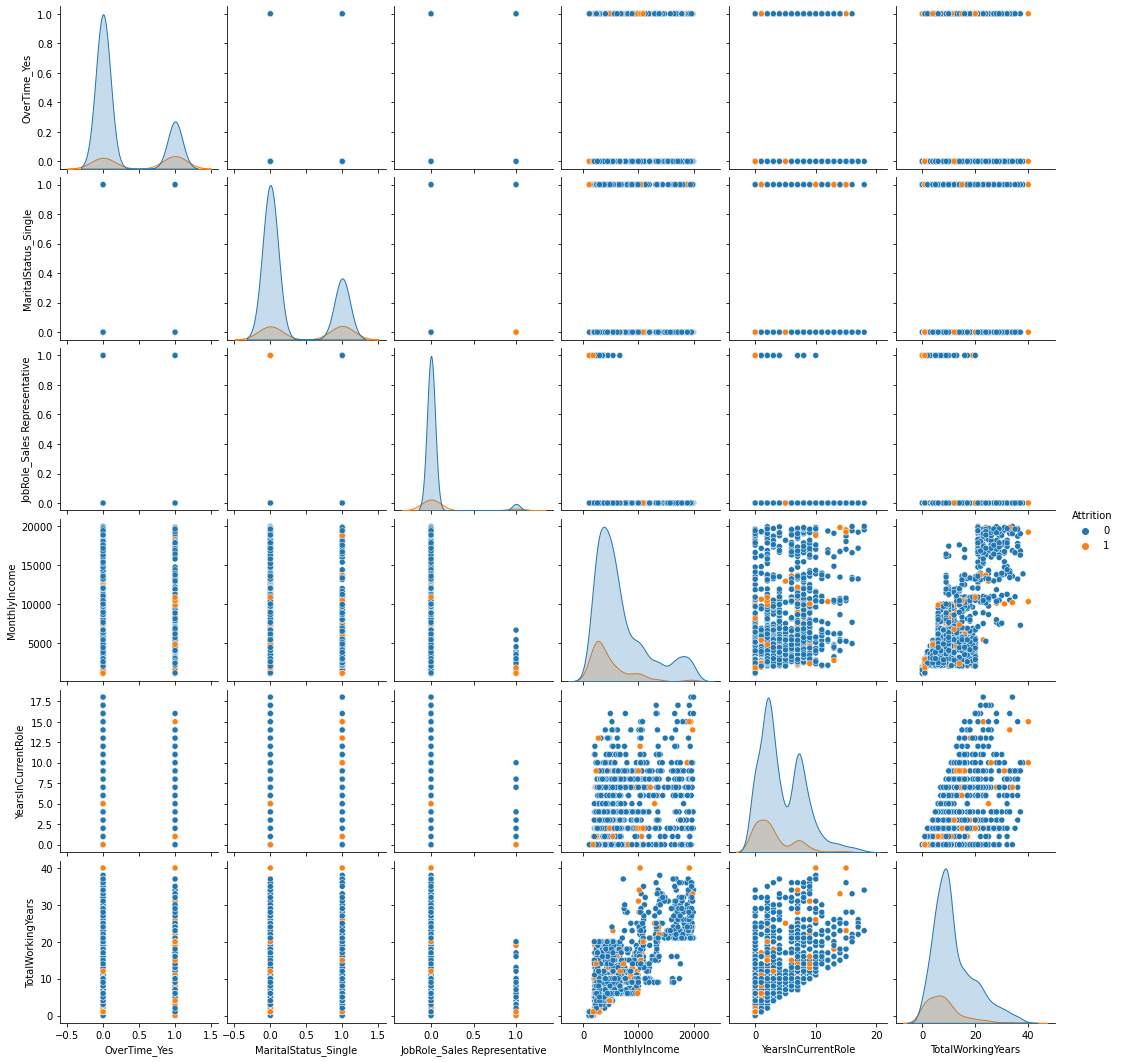

In [ ]:
# Access information using Pairplot analysis of select features
# Based on correlation analysis, only some features were selected in pairplot below (top 3, bottom 3 of .corr list)

sns.pairplot(df[['OverTime_Yes', 'MaritalStatus_Single', 'JobRole_Sales Representative',
                       'MonthlyIncome', 'YearsInCurrentRole', 'TotalWorkingYears',
                       'Attrition']], hue='Attrition')

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

df_clean = pd.concat([X, y], axis=1)

In [ ]:
# Verification of X

X.describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.721769,65.891156,2.728571,6502.931293,14313.103401,2.693197,15.209524,2.712245,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129,0.188435,0.709524,0.653741,0.303401,0.191837,0.389116,0.270748,0.032653,0.412245,0.108163,0.315646,0.055782,0.089796,0.600000,0.255102,0.590476,0.097959,0.363265,0.148299,0.072109,0.046939,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993,0.153741,0.405442,0.107483,0.057823,0.234014,0.607483,0.104082
std,9.135373,403.509100,8.106864,1.093082,20.329428,1.102846,4707.956783,7117.786044,2.498009,3.659938,1.081209,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136,0.391193,0.454137,0.475939,0.459884,0.393879,0.487716,0.444498,0.177787,0.492406,0.310692,0.464931,0.229579,0.285986,0.490065,0.436067,0.491913,0.297361,0.481104,0.355517,0.258756,0.211580,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606,0.360824,0.491144,0.309832,0.233488,0.423525,0.488477,0.305470
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,2.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.

In [ ]:
# Verification of target variable

y.mean()

0.16122448979591836

In [ ]:
# Scaling dataset from range 0-1 for model execution

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns = X.columns)

In [ ]:
# Verification of rescaling

X_rescaled.describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.501421,0.292590,0.573923,0.512731,0.576190,0.289307,0.490629,0.299244,0.300680,0.570748,0.28199,0.466553,0.175204,0.234958,0.145850,0.242537,0.188435,0.709524,0.653741,0.303401,0.191837,0.389116,0.270748,0.032653,0.412245,0.108163,0.315646,0.055782,0.089796,0.600000,0.255102,0.590476,0.097959,0.363265,0.148299,0.072109,0.046939,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993,0.153741,0.405442,0.107483,0.057823,0.234014,0.607483,0.104082
std,0.217509,0.288840,0.289531,0.364361,0.290420,0.367615,0.247918,0.285797,0.277557,0.261424,0.360403,0.19452,0.214878,0.153163,0.201285,0.214829,0.209890,0.391193,0.454137,0.475939,0.459884,0.393879,0.487716,0.444498,0.177787,0.492406,0.310692,0.464931,0.229579,0.285986,0.490065,0.436067,0.491913,0.297361,0.481104,0.355517,0.258756,0.211580,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606,0.360824,0.491144,0.309832,0.233488,0.423525,0.488477,0.305470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.259843,0.035714,0.333333,0.257143,0.333333,0.100158,0.239028,0.111111,0.071429,0.333333,0.15000,0.333333,0.075000,0.111111,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.501074,0.214286,0.666667,0.514286,0.666667,0.205898,0.487513,0.222222,0.214286,0.666667,0.25000,0.500000,0.125000,0.166667,0.066667,0.176471,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.

In [ ]:
# Splitting data into training/test datasets (70/30)

X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

6. Build a sequential neural network with the following parameters: 3 hidden dense layers - 100, 50, 25 nodes respectively, activation function = 'relu', dropout = 0.5 for each layer).
7. Use early stopping callback to prevent overfitting.

7 pts.

In [ ]:
X_train.shape

(1029, 56)

In [ ]:
# Build a sequential neural network

model = Sequential()

model.add(Dense(units=100, activation='relu',))
model.add(Dropout(0.5))

model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# Use early stopping callback to prevent overfitting

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
9/9 [==============================] - 1s 37ms/step - loss: 0.9600 - val_loss: 0.6798
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7232 - val_loss: 0.6158
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6575 - val_loss: 0.5618
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5757 - val_loss: 0.5125
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5340 - val_loss: 0.4722
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5131 - val_loss: 0.4492
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5190 - val_loss: 0.4389
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4960 - val_loss: 0.4341
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4612 - val_loss: 0.4317
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4959 - val_loss: 0.4290
Epoch 11/100
9/9 [==========

8. Plot training and validation losses versus epochs.
9. Print out model confusion matrix.
10. Print out model classification report.
11. Print out model ROC AUC.

4 pts.

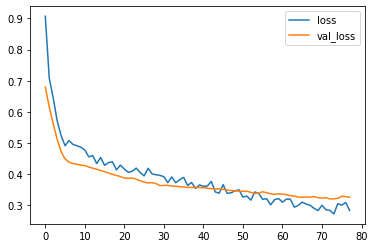

In [ ]:
# Plot training and validation losses versus epochs

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# Print out model confusion matrix, classification report, and ROC AUC
 
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report')
print(classification_report(y_test,y_pred))
print('\n')
print('ROC AUC:')
print(roc_auc_score(y_test,y_pred))

Confusion Matrix
[[351  13]
 [ 47  30]]


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       364
           1       0.70      0.39      0.50        77

    accuracy                           0.86       441
   macro avg       0.79      0.68      0.71       441
weighted avg       0.85      0.86      0.85       441



ROC AUC:
0.6769480519480519


Model results summary: 

Model stopped at 78 epochs
ROC AUC: 0.6769